In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load Dataset
df = pd.read_csv('data/cleaned_salaries.csv')

In [6]:
# Explore Dataset
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,EN,FT,Cyber Security Analyst,45000.0,EUR,50000.0,FR,50,FR,L
1,2024,SE,FT,Security Architect,300000.0,USD,300000.0,US,0,US,M
2,2024,SE,FT,Security Architect,200000.0,USD,200000.0,US,0,US,M
3,2024,EX,FT,Privacy Officer,297000.0,USD,297000.0,US,0,US,M
4,2024,EX,FT,Privacy Officer,216000.0,USD,216000.0,US,0,US,M


### Top 10 Highest-Paying Job Titles

In [25]:
# Sort the dataset by the "salary" column in descending order
sorted_df = df.sort_values(by="salary", ascending=False)

# Get the 10 most common job titles among the highest salaries
top_10_highest_paying_job_titles = sorted_df["job_title"].value_counts().nlargest(10).index

# Print the results
print("The Top 10 Highest-Paying Job Titles:")
for job_title in top_10_highest_paying_job_titles:
    print(job_title)

The Top 10 Highest-Paying Job Titles:
Security Engineer
Security Analyst
Cyber Security Analyst
Penetration Tester
Security Architect
DevSecOps Engineer
Information Security Analyst
Compliance Analyst
Information Security Manager
Cyber Security Engineer


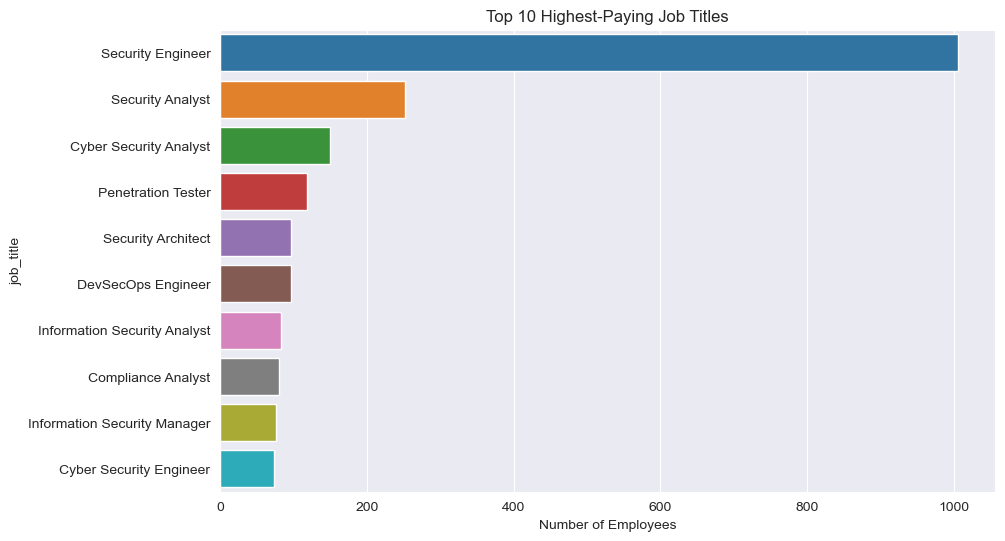

In [26]:
# Sort the dataset by the "salary" column in descending order
sorted_df = df.sort_values(by="salary", ascending=False)

# Get the top 10 highest-paying job titles
top_10_highest_paying_job_titles = sorted_df["job_title"].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 highest-paying job titles
df_top_10_highest_paying = sorted_df[sorted_df["job_title"].isin(top_10_highest_paying_job_titles)]

# Create a bar plot to visualize the top 10 highest-paying job titles
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_10_highest_paying, y="job_title", order=top_10_highest_paying_job_titles)
plt.title("Top 10 Highest-Paying Job Titles")
plt.xlabel("Number of Employees")
plt.show()

### Top 10 Unique Highest-Paying Job Titles

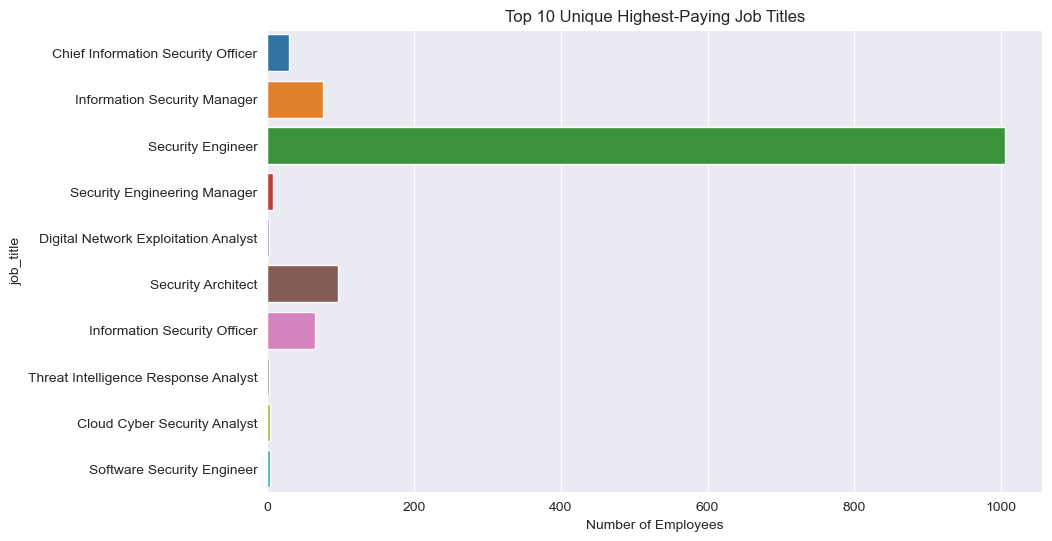

In [20]:
    # Sort by salary and get the top 10 unique highest-paying job titles
sorted_df = df.sort_values(by="salary", ascending=False)
highest_paying_job_titles = sorted_df["job_title"].unique()[:10]

# Filter the dataset to include only those job titles
df_filtered = df[df["job_title"].isin(highest_paying_job_titles)]

# Create a bar plot showing the count of employees for each title
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, y="job_title", order=highest_paying_job_titles)
plt.title("Top 10 Unique Highest-Paying Job Titles")
plt.xlabel("Number of Employees")
plt.show()

In [29]:
# Calculate the average salary for each country and job role
average_salary_by_country = df.groupby(["company_location", "job_title"])["salary"].mean()

# Find the countries that offer the highest average salaries for each job role
highest_average_salary_by_job_role = average_salary_by_country.groupby("job_title").idxmax()

# Print the countries or companies that offer the highest average salaries for each job role
print("Highest Average Salaries by Job Role:")
for job_title, (company_location, _) in highest_average_salary_by_job_role.items():
    print(f"Job Title: {job_title}")
    print(f"Highest Average Salary: {average_salary_by_country.loc[(company_location, job_title)]:.2f}")
    print(f"Country: {company_location}")
    print()

Highest Average Salaries by Job Role:
Job Title: Application Security Analyst
Highest Average Salary: 259000.00
Country: US

Job Title: Application Security Architect
Highest Average Salary: 117000.00
Country: IE

Job Title: Application Security Engineer
Highest Average Salary: 131000.00
Country: US

Job Title: Application Security Specialist
Highest Average Salary: 85000.00
Country: US

Job Title: Azure Security Engineer
Highest Average Salary: 60000.00
Country: US

Job Title: Business Information Security Officer
Highest Average Salary: 60000.00
Country: DE

Job Title: Chief Information Security Officer
Highest Average Salary: 300000.00
Country: AE

Job Title: Cloud Cyber Security Analyst
Highest Average Salary: 300000.00
Country: ZA

Job Title: Cloud Security Architect
Highest Average Salary: 182000.00
Country: US

Job Title: Cloud Security Engineer
Highest Average Salary: 155000.00
Country: GB

Job Title: Cloud Security Engineering Manager
Highest Average Salary: 55000.00
Country: 

### Top 10 Highest-Paying Job Roles and their Countries

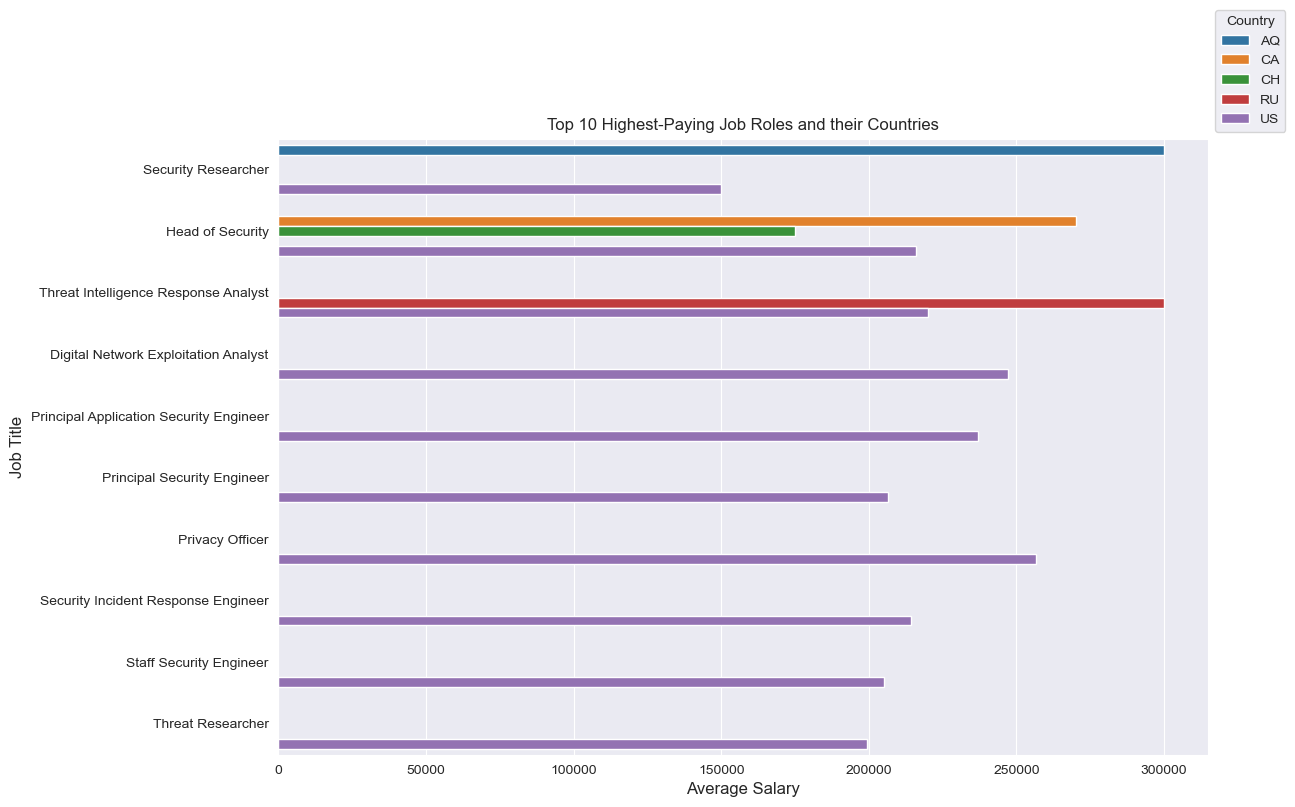

In [40]:
# Calculate the average salary for each country and job role
average_salary_by_country = df.groupby(["company_location", "job_title"])["salary"].mean()

# Find the top 10 highest-paying job roles
top_10_highest_paying_job_roles = average_salary_by_country.groupby("job_title").mean().nlargest(10).index

# Filter the data to include only the top 10 highest-paying job roles
df_top_10_highest_paying = average_salary_by_country[average_salary_by_country.index.get_level_values("job_title").isin(top_10_highest_paying_job_roles)]

# Reset the index to separate the company_location and job_title columns
df_top_10_highest_paying = df_top_10_highest_paying.reset_index()

# Create a bar plot to visualize the top 10 highest-paying job roles and their corresponding countries
plt.figure(figsize=(12, 8))
sns.barplot(data=df_top_10_highest_paying, x="salary", y="job_title", hue="company_location", errorbar=None)
plt.title("Top 10 Highest-Paying Job Roles and their Countries")
plt.xlabel("Average Salary", fontsize=12)
plt.ylabel("Job Title", fontsize=12)
plt.legend(title="Country", bbox_to_anchor=(1, 1), fontsize=10)
plt.tick_params(axis="both", labelsize=10)
plt.show()